In [1]:
### Importing Neccesary libraries

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import shutil
import os
import pandas as pd
import pywt
import joblib
import json

### For model training and tuning
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

## Data Cleaning

In [2]:
img = cv2.imread("./test_images/images.jpg")
img.shape

(183, 275, 3)

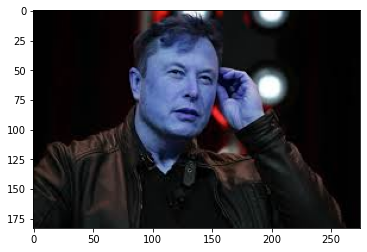

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(183, 275)

In [5]:
gray

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       ...,
       [24, 14,  9, ...,  2,  2,  2],
       [25, 15, 12, ...,  2,  2,  2],
       [22, 22, 22, ...,  2,  2,  2]], dtype=uint8)

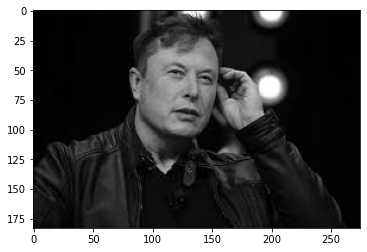

In [6]:
plt.imshow(gray,cmap="gray")

### We are gonna use frontface and eye xml files from OpenCv files. The reason is that usually faces are identified using the presence of two eyes.

In [7]:
face_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[91, 24, 75, 75]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(91, 24, 75, 75)

### Here x,y,w,h are the dimensions of the detected image.

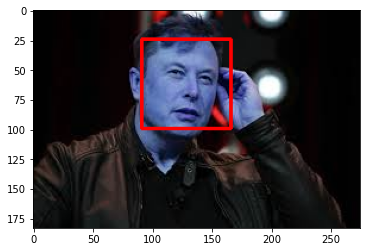

In [9]:
### Providing x,y,w,h to draw an rectangle around the detected face
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

### Now that we have detected the face, the next thing we need is the eyes. The image will only be useful when it has two proper eyes.

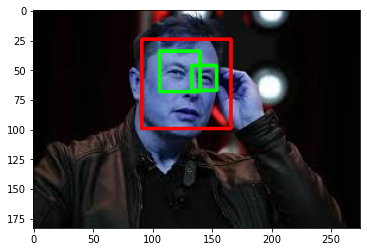

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap="gray")
plt.show()

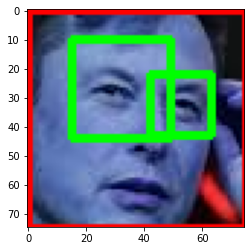

In [11]:
### Getting the cropped version of the image
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

### Now we need extract a cropped image of the person's face for every picture we have. So we are going to create an function that returns a cropped image if it detects an face and 2 eyes

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path) ### Read the image
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5) ### Detect the face
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w] ### Cropping the detected face
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray) ### Detecting eyes from the cropped face
            if len(eyes) >= 2:
                print("Sucess!!")
                return roi_color

In [13]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [14]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path) ### Appending each celebrity folder to the list
img_dirs

['./dataset/cropped',
 './dataset/Elon Musk',
 './dataset/Jeff Bezos',
 './dataset/Larry Page',
 './dataset/Mark Zuckerberg',
 './dataset/Steve Jobs']

In [15]:
if os.path.exists(path_to_cr_data): ### If a folder named cropped already exists delete it
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data) ### Creating a new folder named cropped

In [16]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1] ### Extracing the celebrtiy name from the path
    celebrity_file_names_dict[celebrity_name] = []
    print(celebrity_name)
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path) ### Using the function to get a cropped image
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name 
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder) ### Craeting a sub folder under cropped for each celebrity
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name  ### Creating an unique file path for every cropped image
            
            cv2.imwrite(cropped_file_path, roi_color) ### Saving the croppped image under it's respective path
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 
            
### The celebrity file names dict looks something like this
### {
###    'Bill Gates':[
###        "./datasets/cropped/Bill Gates/Bill Gates1.png",
###         "./datasets/cropped/Bill Gates/Bill Gates1.png"
###    ],
###    'Elon Musk':[
###        "./datasets/cropped/Elon Musk/Elon Musk1.png",
###         "./datasets/cropped/Elon Musk/Elon Musk2.png"
###    ],
        
### }

cropped
Elon Musk
Sucess!!
Generating cropped images in folder:  ./dataset/cropped/Elon Musk
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Jeff Bezos
Sucess!!
Generating cropped images in folder:  ./dataset/cropped/Jeff Bezos
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
Sucess!!
S

### After creating the cropped folder, we have to manually delete some unwanted images. 

## Feature Engineering

### Wavelet transform is one of the common methods used in computer vision to extract features from images. We are going to use to here as well.

In [17]:
### Creating an function that takes in an image and returns the wavelet transform
def wavelet_transform(img, mode='haar', level=1):
    imArray = img
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

### Next we are gonna stack the cropped image and the wavelet transform of the image vertically for our input feature. We are gonna do this for all images.

In [18]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    if celebrity_name != "cropped":
        class_dict[celebrity_name] = count
        count = count + 1
class_dict

{'Elon Musk': 0,
 'Jeff Bezos': 1,
 'Larry Page': 2,
 'Mark Zuckerberg': 3,
 'Steve Jobs': 4}

### Since we removed some unwanted images manually, we are going to write a code that helps us check whether the specfic image is present or not

In [19]:
celebrity_file_names_dict = {}
for img_dirs in cropped_image_dirs:
    celebrity_name = img_dirs.split("/")[-1]
    file_list = []
    for entry in os.scandir(img_dirs):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Elon Musk': ['./dataset/cropped/Elon Musk\\Elon Musk1.png',
  './dataset/cropped/Elon Musk\\Elon Musk10.png',
  './dataset/cropped/Elon Musk\\Elon Musk12.png',
  './dataset/cropped/Elon Musk\\Elon Musk13.png',
  './dataset/cropped/Elon Musk\\Elon Musk14.png',
  './dataset/cropped/Elon Musk\\Elon Musk16.png',
  './dataset/cropped/Elon Musk\\Elon Musk19.png',
  './dataset/cropped/Elon Musk\\Elon Musk2.png',
  './dataset/cropped/Elon Musk\\Elon Musk20.png',
  './dataset/cropped/Elon Musk\\Elon Musk23.png',
  './dataset/cropped/Elon Musk\\Elon Musk24.png',
  './dataset/cropped/Elon Musk\\Elon Musk25.png',
  './dataset/cropped/Elon Musk\\Elon Musk27.png',
  './dataset/cropped/Elon Musk\\Elon Musk29.png',
  './dataset/cropped/Elon Musk\\Elon Musk31.png',
  './dataset/cropped/Elon Musk\\Elon Musk32.png',
  './dataset/cropped/Elon Musk\\Elon Musk36.png',
  './dataset/cropped/Elon Musk\\Elon Musk37.png',
  './dataset/cropped/Elon Musk\\Elon Musk39.png',
  './dataset/cropped/Elon Musk\\Elon Mu

In [20]:
X = []
Y = []

for celebrity_name, training_files in celebrity_file_names_dict.items(): ### Retriving the file path for every cropped image
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img,(32,32)) ### Scaling the cropped image
        img_har = wavelet_transform(img,'db1',5) ### Retriving the wavelet transform for the cropped image
        scalled_img_har = cv2.resize(img_har,(32,32)) ### Scaling the wavelet transform to the same size the cropped image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        Y.append(class_dict[celebrity_name])
                      

In [21]:
len(X)

186

In [22]:
len(Y)

186

In [23]:
X = npX = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(186, 4096)

## Model Training

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)
    
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,Y_train)
pipe.score(X_test,Y_test)

0.8085106382978723

In [25]:
print(classification_report(Y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.91      0.91        11
           2       1.00      0.89      0.94         9
           3       0.70      0.70      0.70        10
           4       0.75      0.90      0.82        10

    accuracy                           0.81        47
   macro avg       0.81      0.79      0.80        47
weighted avg       0.81      0.81      0.81        47



## Hyperparameter tuning

### We are going to use GridSearchCV to train different models with different parameters.

In [26]:
### Creating a dictionary for several models that you want to try and their respective parameters

model_params = {
    'svm':{
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C':[1,10,100,1000],
            'svc__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logisitc_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [27]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model']) ### Scale the data
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False) ### We are using cv=5 for GridSearchCv and Tuning the model
    clf.fit(X_train, Y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.733069,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.545238,{'randomforestclassifier__n_estimators': 10}
2,logisitc_regression,0.791534,{'logisticregression__C': 1}


In [28]:
best_estimators['svm'].score(X_test,Y_test)

0.8297872340425532

In [29]:
best_estimators['random_forest'].score(X_test,Y_test)

0.6170212765957447

In [30]:
best_estimators['logisitc_regression'].score(X_test,Y_test)

0.9148936170212766

In [32]:
best_clf = best_estimators['logisitc_regression']

In [33]:
cm = confusion_matrix(Y_test,best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  0,  1],
       [ 0, 11,  0,  0,  0],
       [ 0,  0,  9,  0,  0],
       [ 0,  0,  0,  9,  1],
       [ 2,  0,  0,  0,  8]], dtype=int64)

<IPython.core.display.Javascript object>

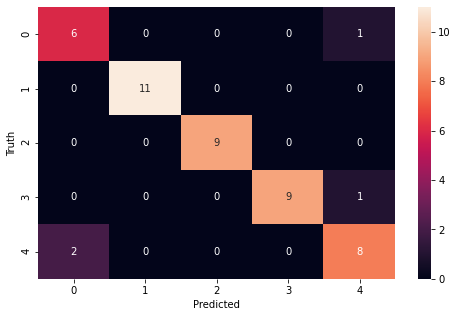

In [37]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

## Saving the model

In [38]:
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [39]:
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))